# Lab Segmentation 1

In [1]:
from commonfunctions import *
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin,binary_opening
from skimage.filters import median

# import math
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import math

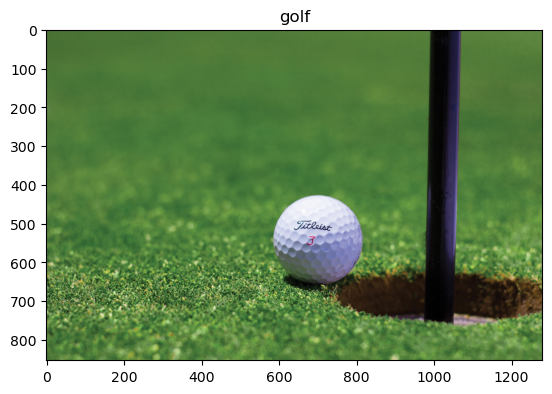

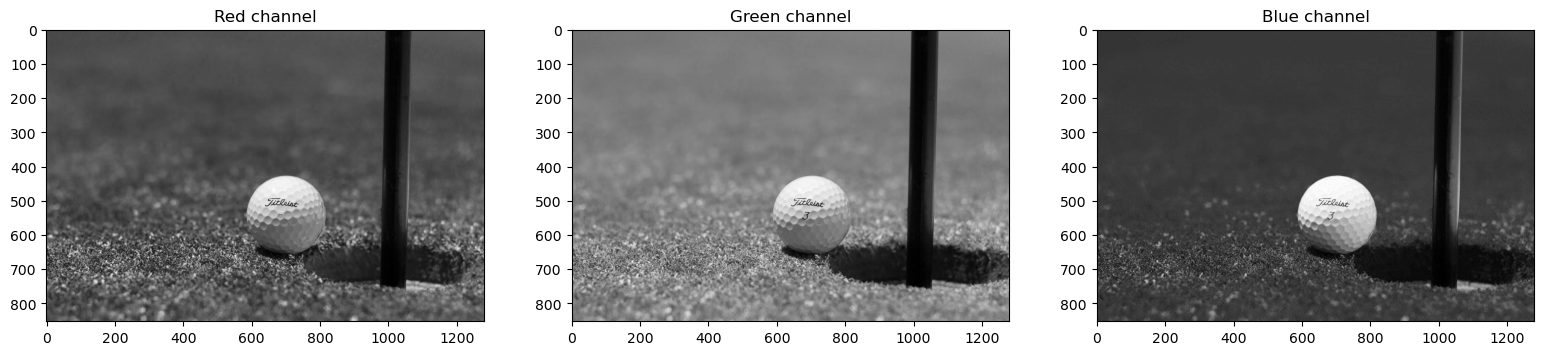

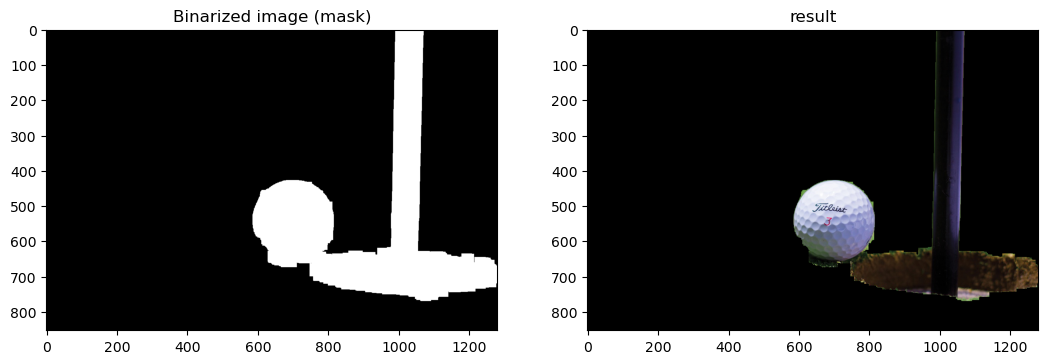

In [4]:
## For all requirements: The quality of the results is evaluated.


# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)
golf = io.imread('./imgs/exp1/golf.jpeg')
show_images([golf],['golf'])
golf = golf.astype(float)
# read image golf
# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)
r_channel, g_channel, b_channel= golf[:,:,0],golf[:,:,1],golf[:,:,2]
show_images([r_channel,g_channel,b_channel],['Red channel', 'Green channel', 'Blue channel'])

# showHist(r_channel)
# showHist(g_channel)
# showHist(b_channel)
# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)
r_green, g_green, b_green  =83, 126, 57
# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)

r_difference = 25
g_difference = 25
b_difference = 10
mask = (abs(g_channel - g_green) < g_difference) & ( abs(r_channel - r_green) < r_difference) &  (abs(b_channel - b_green )< b_difference)


mask = ~mask


mask = binary_opening(mask, footprint= np.ones(shape= (30,30)))



golf[:,:,0],golf[:,:,1],golf[:,:,2] = golf[:,:,0]*mask, golf[:,:,1]*mask, golf[:,:,2]*mask

# 6- display the binarized image
show_images([mask,golf.astype(int)],['Binarized image (mask)', 'result'])





(279, 620, 3)
(279, 620)


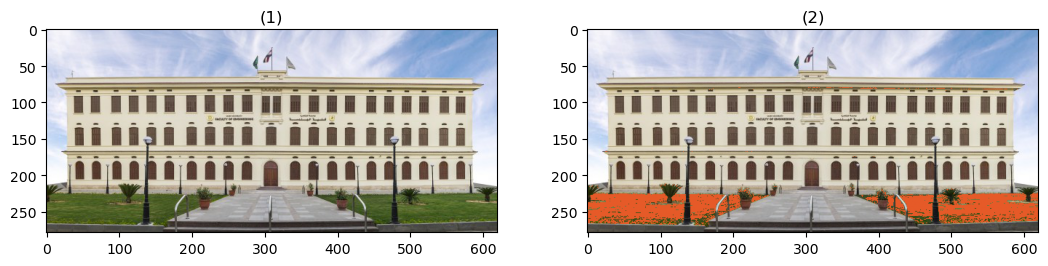

In [4]:
# 1- Get the required RGB color (Using a color picker)

# 2- Read image
cufe = io.imread('./imgs/exp2/cufe.png')

cufe = cufe.astype(float)
# 3- extract R, G and B channels (as float)
R, G, B = cufe[:,:,0], cufe[:,:,1], cufe[:,:,2],

# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)
target_r, target_g, target_b =80, 106, 41

R_diff = R-target_r
G_diff = G-target_g
B_diff = B-target_b

# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)


total_diff =np.sqrt( np.abs(R_diff)**2 +  np.abs(G_diff)**2 +  np.abs(B_diff)**2)

print(cufe.shape)
print(total_diff.shape)
result = cufe.copy()

mask = total_diff< 30
result [mask] = (230,90,40)

# 7- In the input image, Replace the pixels of the mask with the following color
R_replacement = 230 
G_replacement = 90 
B_replacement = 40

show_images([cufe/255, result/255])
# 8- show the image or save it
